# Classificação de textos - Análise de Sentimentos
## Processamento de Linguagem Natural
Nesta aula continuaremos trabalhando com Classificação de textos, porém agora focaremos em uma tarefa específica, chamada de **Análise de Sentimentos**. 

O objetivo é que ao final desta aula você:
1. Entenda o que é a **Análise de Sentimentos**
2. Saiba treinar um classificador supervisionado para realizar análise de sentimentos usando um corpus anotado
3. Aprenda a utilizar a biblioteca Polyglot do Python que já possui métodos para identificar polaridade de textos em português
4. Acesse API do Twitter para obter dados em tempo real de redes sociais




**ALUNOS: JUAN MANOEL MARINHO NASCIMENTO E GUSTAVO DA SILVA ROSSI**

### **O que é a Análise de Sentimentos?**

É a interpretação e classificação de emoções relativas a um texto, sendo estas emoções explícitas declaradas no texto ou implícitas.

![Análise de sentimentos. Fonte: https://monkeylearn.com/sentiment-analysis/](https://docs.google.com/uc?export=download&id=1okG1oHXPhnZiBBTtpZG4b3VdaWovCndT)

É uma tarefa de PLN/Machine Learning que permite empresas identificarem os sentimentos dos consumidores em relação a produtos, marcas ou serviços, através de opiniões deixadas em redes sociais ou em canais de comunicação da empresa.


















### **Como treinar um classificador para realizar a Análise de Sentimentos?**
Iremos desenvolver nosso classificador, utilizando uma abordagem supervisionada, ou seja, precisaremos de dados rotulados com suas respectivas emoções.

O pipeline de execução é muito similar aos exemplos de classificação realizados na última semana, o que muda efetivamente são as classes/categorias envolvidas.

#### Dados
Para este exemplo iremos trabalhar com uma [base de dados de notícias](https://www.aclweb.org/anthology/W15-5616.pdf), rotulada com as emoções básicas de [Ekman](https://www.tandfonline.com/doi/abs/10.1080/02699939208411068): **alegria**, **tristeza**, **raiva**, **medo**, **repugnância** e **surpresa**. Em caso de ausência de emoção, a categoria **neutro** foi aplicada.



> **IMPORTANTE**: Faça o upload da base de dados para seu ambiente Google Colab ou Jupyter Notebook! Segue o [link](https://drive.google.com/file/d/12-mbbvHtnDVRTbQnhmOfnIXppbQ0hoyn/view?usp=sharing) para acesso.



#### Fluxo de execução
Vamos seguir o seguinte fluxo de processamento dos dados:


1.   Abrir o corpus
2.   Remover as stop-words
3.   Aplicar stemmer
4.   Gerar o Bag of Words
5.   Treinar o modelo SVM
6.   Predizer/Avaliar o modelo



In [8]:
!ls

'analise-sentimentos-2000-noticias (1).txt'
 env
'[ONLINE]_Classificação_de_textos_Análise_de_Sentimentos.ipynb'


In [3]:
# Abre corpus
f = open("analise-sentimentos-2000-noticias (1).txt", "r", encoding="utf-8-sig")
linhas = f.readlines()

corpus_textos = []
corpus_rotulos = []

# Percorre as 2000 linhas
for linha in linhas:

  # Separa texto e rótulo/categoria/emoção
  item = linha.split(";;")

  corpus_rotulos.append(item[0])
  corpus_textos.append(item[1])

In [4]:
# 5 primeiros textos
corpus_textos[0:5]

['irã liberta viúva condenada ao apedrejamento, diz comitê internacional. a viúva iraniana sakineh mohammadi-ashtiani, condenada à morte por apedrejamento, foi libertada juntamente com o seu filho e o seu advogado, anunciou nesta quinta-feira (9) o comitê internacional contra apedrejamento, sediado na alemanha.\n',
 'haiti sofre com cólera depois da passagem do furacão sandy. após a passagem do furacão sandy pelo haiti, o país vive as dificuldades da reconstrução, além de problemas causados pela contaminação da bactéria que causa o cólera.\n',
 'mulher acorda e encontra crocodilo de 3 m e 27 ovos no jardim de casa. especialistas capturaram e transferiram animal para local adequado.\n',
 'enchentes causam a morte de 4 pessoas em al: vítimas são mãe, filho, idosa de 100 anos e adolescente. defesa civil da capital já registrou mais de 30 ocorrências.\n',
 'sem detalhes do que será discutido, revisão do plano diretor começa na segunda (17). dez oficinas, 19 audiências públicas e canal inte

In [9]:
# 5 primeiros rótulos
corpus_rotulos[0:5]

['alegria', 'tristeza', 'surpresa', 'tristeza', 'neutro']

Em nossos exemplos de classificação anteriores, separamos parte do banco de dados para **TREINAMENTO** e outra parte para **TESTE**, nesse tipo de avaliação que chamamos de **hold-out**.

Existem outras formas de realizar a avaliação, inclusive mais indicadas de acordo com a situação, mas isto não está no escopo de nossa disciplina, caso queira saber mais métodos de avaliação como o **cross-validation**, leia [este post](https://medium.com/@eijaz/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f).

In [11]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 24.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 17.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 28.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [12]:
from sklearn.model_selection import train_test_split

# O próprio sklearn tem um método para dividir a base de dados em treinamento e teste
# Neste caso estamos deixando 90% para treinamento e 10% para testes
corpus_treinamento, corpus_teste, rotulos_treinamento, rotulos_teste = train_test_split(corpus_textos, corpus_rotulos, test_size=0.10, random_state=42)

In [13]:
len(corpus_treinamento)

1800

In [14]:
len(corpus_teste)

200

In [15]:
len(rotulos_treinamento)

1800

In [16]:
len(rotulos_teste)

200

In [18]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.4 MB/s eta 0:00:00m eta 0:00:01:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.9/764.9 KB 12.7 MB/s eta 0:00:0031m71.6 MB/s eta 0:00:01


Vamos deixar preparada uma função para pré-processar os textos, utilizando uma lista de stop-words com novos itens, o stemming e normalização dos textos.

In [19]:
import nltk
from nltk import tokenize
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('portuguese') #carrega stopwords da lingua portuguesa disponíveis no NLTK
stopwords += (',','.','(',')','"',"'",'´','`','!','$','%','&','...','-',':',';','?','``','\'\'') #acrescenta simbolos
stopwords += ('a','e','i','o','u','A','E','I','O','U') #acrescenta também vogais

stemmer = nltk.stem.RSLPStemmer()

def my_preprocessor(text):
    
    # Normaliza para minúsculas
    text=text.lower() 
    
    # Tokeniza
    words = tokenize.word_tokenize(text, language='portuguese')
    # Remove stop-words
    words_no_stopwords = [word for word in words if not word in stopwords]
    # Aplica stemming
    stemmed_words=[stemmer.stem(word=word) for word in words_no_stopwords]
    return ' '.join(stemmed_words)

[nltk_data] Downloading package stopwords to /home/juan-
[nltk_data]     nascimento/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /home/juan-
[nltk_data]     nascimento/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /home/juan-
[nltk_data]     nascimento/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Agora vamos extrair os atributos do texto (gerar a representação vetorial - bag of words) e criar nosso pipeline de classificação usando o classificador SVM.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

# Primeiro aplica o BoW, depois envia dados ao classificador SVM
# (SEM retirada de stop-words e stemming)
sent_clf = Pipeline([('vect', CountVectorizer()),('clf', SVC(kernel='linear', C=1))])

# Depois de executar uma vez, verifique os resultados e compare-os depois de descomentar a linha abaixo, onde retiramos as stop-words e aplicamos stemming
# (COM retirada de stop-words e stemming)
#sent_clf = Pipeline([('vect', CountVectorizer(preprocessor = my_preprocessor)),('clf', SVC(kernel='linear', C=1))])

In [21]:
# Inicia treinamento 
sent_clf = sent_clf.fit(corpus_treinamento, rotulos_treinamento)

Já temos nosso modelo treinado! Agora vamos predizer a base de teste e avaliar os resultados.

In [22]:
# Prediz base de teste
rotulos_preditos = sent_clf.predict(corpus_teste)

In [81]:
from sklearn.metrics import classification_report

# Mostra relatório completo de avaliação
print(classification_report(rotulos_teste, rotulos_preditos))

              precision    recall  f1-score   support

     alegria       0.00      0.00      0.00        19
    desgosto       0.44      0.26      0.33        27
        medo       0.32      0.39      0.35        18
      neutro       0.52      0.73      0.61        51
       raiva       0.29      0.29      0.29         7
    surpresa       0.42      0.47      0.44        32
    tristeza       0.66      0.59      0.62        46

    accuracy                           0.48       200
   macro avg       0.38      0.39      0.38       200
weighted avg       0.45      0.47      0.45       200



In [86]:
pd.DataFrame(classification_report(rotulos_teste, rotulos_preditos,output_dict=True)).T

,precision,recall,f1-score,support
alegria,0.000000,0.000000,0.000000,19.000
desgosto,0.437500,0.259259,0.325581,27.000
medo,0.318182,0.388889,0.350000,18.000
neutro,0.521127,0.725490,0.606557,51.000
raiva,0.285714,0.285714,0.285714,7.000
surpresa,0.416667,0.468750,0.441176,32.000
tristeza,0.658537,0.586957,0.620690,46.000
accuracy,0.475000,0.475000,0.475000,0.475
macro avg,0.376818,0.387866,0.375674,200.000
weighted avg,0.448716,0.475000,0.453472,200.000


In [27]:
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 24.9 MB/s eta 0:00:00m eta 0:00:010:00:01


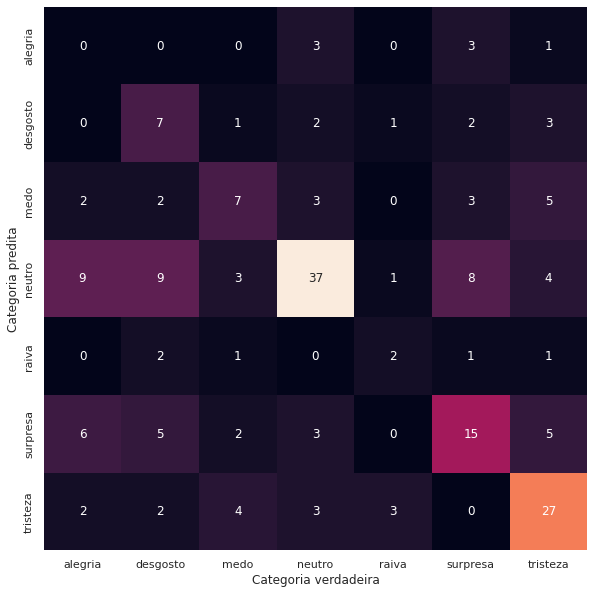

In [28]:
from sklearn.metrics import confusion_matrix

# Podemos imprimir a matriz de confusão para tentar entender melhor os resultados
mat = confusion_matrix(rotulos_teste, rotulos_preditos)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

rotulos_nomes = ['alegria', 'desgosto', 'medo', 'neutro', 'raiva', 'surpresa', 'tristeza']

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=rotulos_nomes, yticklabels=rotulos_nomes )
plt.xlabel('Categoria verdadeira')
plt.ylabel('Categoria predita');

> **CONCLUSÃO**: Apesar de verificarmos melhoria ao pré-processarmos o texto, os resultados ainda são regulares.

#### **Atividade Somativa 2 - Como podemos tentar melhorar os resultados?**

**1) Redução da granularidade dos sentimentos**
Como podemos ver na matriz de confusão o classificador tem vários pontos de erro, em todas emoções. E se modificarmos o corpus para ao invés de 7 emoções, trabalhar com as 3 clássicas (positivo, neutro, negativo)?

Vamos então adotar a seguinte sistemática de atualização da base de dados:

A classe "**positivo**" será obtida utilizando-se as instâncias da base original rotuladas como "alegria". 

A classe "**negativo**" será obtida utilizando-se as instâncias rotuladas como "raiva", "medo", "desgosto" e "tristeza". 

Já a classe "**neutro**", utilizará as instâncias da base original rotuladas como "neutro". 

As instâncias rotuladas como "surpresa" não serão utilizadas.

Crie um novo arquivo para esta base de dados atualizada, carregue-o em nosso notebook e compare os resultados.




In [77]:
import pandas as pd 


In [78]:
label_train = " ".join(rotulos_treinamento).replace("alegria","positivo").replace("raiva","negativo").replace("medo","negativo").replace("desgosto","negativo").replace("tristeza","negativo").split()

In [79]:
data = list()
for k,r,v in zip(label_train,rotulos_treinamento, corpus_treinamento):
    value = {"label":k,"label_original":r,"corpus":v}
    data.append(value)

df = pd.DataFrame(data)

In [80]:
df[['label','corpus']].query("label != 'surpresa'").to_csv("base_clean.csv",index=False)

##  Resultado modelo treinado com Corpus Apenas com Positivo e Negativo e Neutro 

In [3]:
!python train.py 

Matriz de Confução :  output_2022-04-16 21:16:48.397139.png
              precision    recall  f1-score     support
negativo       0.798165  0.896907  0.844660   97.000000
neutro         0.659091  0.659091  0.659091   44.000000
positivo       0.200000  0.058824  0.090909   17.000000
accuracy       0.740506  0.740506  0.740506    0.740506
macro avg      0.552419  0.538274  0.531553  158.000000
weighted avg   0.695076  0.740506  0.711883  158.000000
/home/juan-nascimento/Modelos/PNL/env/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



**2) Configuração dos parâmetros de extração de atributos e do classificador**
Altere a configuração de pelo menos um atributo gerado pela vetorização das palavras (i.e., CountVectorizer) e também pelo classificador utilizado.

In [5]:
!cat train.py | grep Pipeline

from sklearn.pipeline import Pipeline
    #sent_clf = Pipeline([('vect', CountVectorizer()),('clf', SVC(kernel='linear', C=1))])
    sent_clf = Pipeline([('vect', CountVectorizer(lowercase=False)),('clf', SVC(kernel='poly', C=1))])
    #sent_clf = Pipeline([('vect', CountVectorizer()),("tfidf", TfidfTransformer()),("clf", SGDClassifier())])


In [6]:
!python train.py

/home/juan-nascimento/Modelos/PNL/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/juan-nascimento/Modelos/PNL/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/juan-nascimento/Modelos/PNL/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,


**3) Adicione novas etapas de extração de atributos ou de pré-processamento**
Incorpore ao menos uma nova etapa de pré-processamento ou extração de atributos (e.g., TF-IDF) ao pipeline atual.



In [15]:
!cat train.py | grep Pipe

from sklearn.pipeline import Pipeline
    #sent_clf = Pipeline([('vect', CountVectorizer()),('clf', SVC(kernel='linear', C=1))])
    #sent_clf = Pipeline([('vect', CountVectorizer(lowercase=False)),('clf', SVC(kernel='poly', C=1))])
    sent_clf = Pipeline([('vect', CountVectorizer(lowercase=False)),('clf', SVC(kernel='linear', C=1))])
    #sent_clf = Pipeline([('vect', CountVectorizer()),("tfidf", TfidfTransformer()),("clf", SGDClassifier())])


In [16]:
!python train.py 

Matriz de Confução :  output_2022-04-16 21:22:21.016985.png
              precision    recall  f1-score     support
negativo       0.798165  0.896907  0.844660   97.000000
neutro         0.659091  0.659091  0.659091   44.000000
positivo       0.200000  0.058824  0.090909   17.000000
accuracy       0.740506  0.740506  0.740506    0.740506
macro avg      0.552419  0.538274  0.531553  158.000000
weighted avg   0.695076  0.740506  0.711883  158.000000
/home/juan-nascimento/Modelos/PNL/env/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


**4) Utilize outro classificador de texto**
Treine ao menos um novo modelo utilizando um classificador de textos diferentes. Ele pode pertencer à biblbioteca sklearn ou qualquer outra.


In [17]:
!cat train.py | grep Pipe
!python train.py 

from sklearn.pipeline import Pipeline
    #sent_clf = Pipeline([('vect', CountVectorizer()),('clf', SVC(kernel='linear', C=1))])
    #sent_clf = Pipeline([('vect', CountVectorizer(lowercase=False)),('clf', SVC(kernel='poly', C=1))])
    #sent_clf = Pipeline([('vect', CountVectorizer(lowercase=False)),('clf', SVC(kernel='linear', C=1))])
    sent_clf = Pipeline([('vect', CountVectorizer()),("tfidf", TfidfTransformer()),("clf", SGDClassifier())])
Matriz de Confução :  output_2022-04-16 21:22:46.360891.png
              precision    recall  f1-score     support
negativo       0.805556  0.896907  0.848780   97.000000
neutro         0.674419  0.659091  0.666667   44.000000
positivo       0.428571  0.176471  0.250000   17.000000
accuracy       0.753165  0.753165  0.753165    0.753165
macro avg      0.636182  0.577490  0.588482  158.000000
weighted avg   0.728475  0.753165  0.733639  158.000000
/home/juan-nascimento/Modelos/PNL/env/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: U

## Codigo Fonte Final do Projeto 

Em cada etapa do projeto, pensei em entender melhor os processos de treinamento do modelo e geração do pipeline, percebi oque por mais um tip indice no pipeline pode gerar interferancia no processo de treinamento do modelo, percebi tambem pelo mlflow as metricas versionadas que o primeiro modelo deu bem certo e parte da estrutira funciona bem, pensei em testar outras formas de ajuste de hiperparametros, dessa forma é bem possivel otimizar o modelo e gerar bons resultados.

Ao observar o comportamento da matrix de confusão podemos ver claramente o comportamento de cada ajuste em cadas parte do pipeline e entender de forma clara os melhores modelos. 

In [25]:
from PIL import Image
pil_im = Image.open('output_2022-04-16 21:16:48.397139.png')

images = ['output_2022-04-16 21:16:48.397139.png',
'output_2022-04-16 21:22:21.016985.png',
'output_2022-04-16 21:22:46.360891.png']

images = [Image.open(img) for img in images]

In [26]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

grid = image_grid(images, rows=1, cols=3)


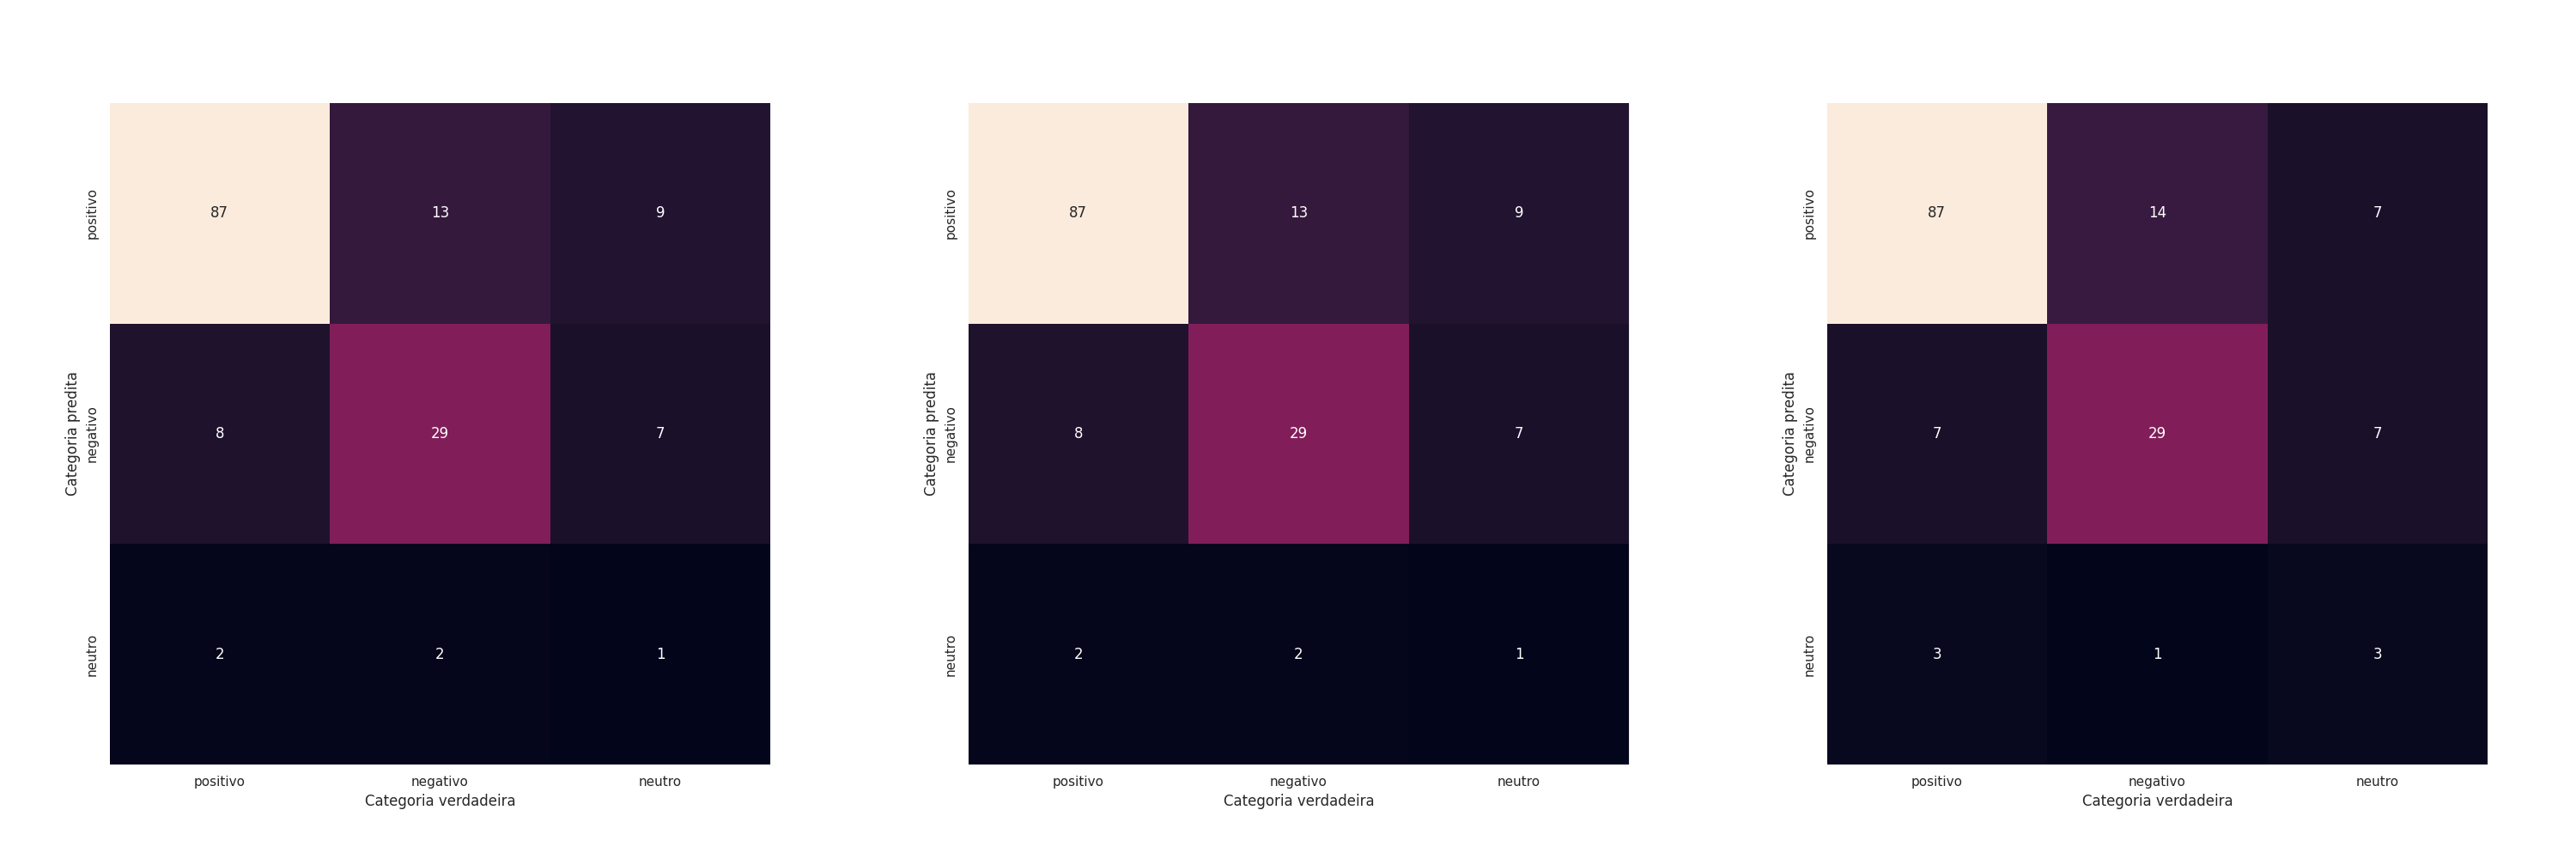

In [27]:
grid

In [28]:
!cat train.py 

import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import mlflow 

from datetime import datetime as dt 

mlflow.set_tracking_uri("http://192.168.15.77:8080")
mlflow.set_experiment("clf-atp-pucpr")

def load_data():
    df = pd.read_csv("base_clean.csv")
    label, corpus = df['label'].tolist(),df['corpus'].tolist()
    corpus_treinamento, corpus_teste, rotulos_treinamento, rotulos_teste = train_test_split(corpus, label, test_size=0.10, random_state=42)
    return corpus_treinamento, corpus_teste, rotulos_treinamento, rotulos_teste
    

def train(corpus_treinamento, rotulos_treinamento):
    #sent_clf = Pipeline([('vec

In [10]:
from datetime import datetime as dt 

In [14]:
str(dt.now()).split(".")[0].replace(" ","_")

'2022-04-16_21:20:48'